Importing modules

In [44]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt

Create data files with data and the headings

In [2]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

In [3]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Convert the text files into a dataframe

In [4]:
original_df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1)
original_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out values where i = -9999.0, z = -9999.0, and redshift = 0.00

In [5]:
df_filtered = original_df[(original_df['i'] != -9999.0) & (original_df['z'] != -9999.0) & (original_df['redshift'] != 0.00)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out values where redshift < 0.01, because there are a lot of filler values at 0.01 for some reason

In [6]:
final_df = df_filtered[(df_filtered['redshift'] > 0.01)]
final_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out outliers from final_df

In [7]:
no_outliers_df = final_df[numpy.abs(final_df['redshift']-final_df['redshift'].mean())\
                             <=(3*final_df['redshift'].std())]
no_outliers_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Plots a histogram of the values in each column of no_outliers_df. The purpose of this is to find outliers or filler values that could be throwing off the plots.

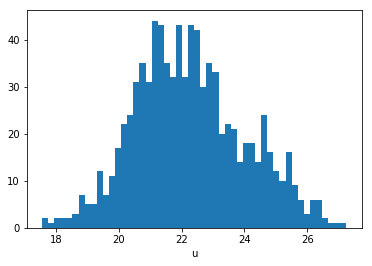

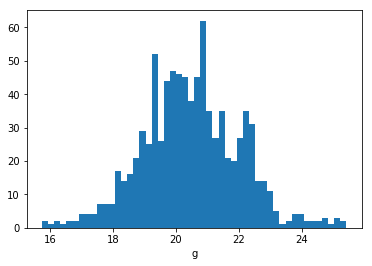

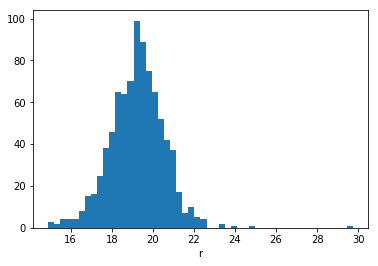

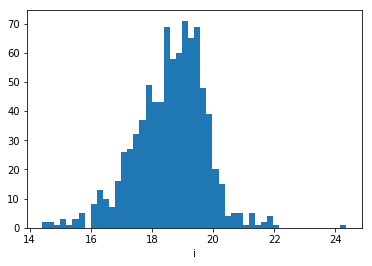

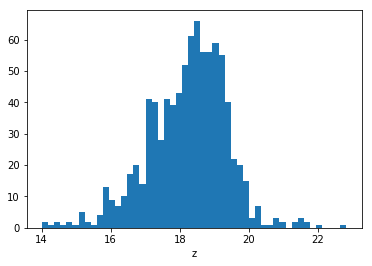

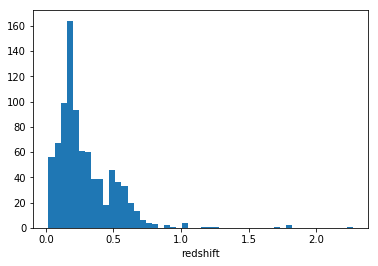

In [45]:
for name in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    plt.hist(no_outliers_df[name], bins=50)
    plt.xlabel(name)
    plt.show()

Creates a new dataframe with four new columns. Each column takes the difference between adjacent columns.

In [11]:
d= {'a': no_outliers_df['g'] - no_outliers_df['r'],
    'b': no_outliers_df['r'] - no_outliers_df['i'],
    'c': no_outliers_df['i'] - no_outliers_df['z'],
    'd': no_outliers_df['u'] - no_outliers_df['g']
   }
add_columns_df = pd.DataFrame(d)
add_columns_df.head()

df = pd.concat([no_outliers_df, add_columns_df], axis = 1)

df = df[(df['r'] < 25) & (df['b'] > -1) & (df['c'] < 2) & (df['c'] > -0.5)]
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid,a,b,c,d
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322,1.74958,0.68151,0.13412,4.93165
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368,0.65768,0.37921,0.29902,1.14409
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374,1.21367,0.55975,0.36866,1.81583
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367,0.92357,0.50392,0.40836,0.67811
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281,0.99048,1.38181,0.47651,2.95084


Creates x, a dataframe with the columns of magnitude differences and one column of magnitudes (in this case it was u, but it could be anything). Also creates y, which is the redshift column

In [12]:
y = df['redshift']
x = df.iloc[:,[3, 13, 14, 15, 16]]
x.head()

,u,a,b,c,d
0,25.92735,1.74958,0.68151,0.13412,4.93165
1,19.38905,0.65768,0.37921,0.29902,1.14409
2,21.50923,1.21367,0.55975,0.36866,1.81583
3,20.96947,0.92357,0.50392,0.40836,0.67811
4,25.27165,0.99048,1.38181,0.47651,2.95084


In [13]:
x.shape

(865, 5)

# Linear Regression

Imports the linear model and fits it to x and y.

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit (x,y)
print(reg.coef_)
print(reg.intercept_)

[ 0.00321352  0.04744764  0.37333739  0.01887991 -0.04351328]
0.0


Defines a manual linear regression function.

In [31]:
def dumb_linreg(x, coef, intercept):
    return x * coef + intercept

Defines a function which returns 50 floats between the minimum and maximum of a column

In [213]:
def x_for_plotting(dataframe, column):
    out = numpy.linspace(min(dataframe[column]), max(dataframe[column]), 50)
    return(out)

Defines a chi square error function.

In [33]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/numpy.var(predicted_y)**2
    print(error)

Creates x_for_plotting_list, an array of all of the 50 floats for each column of x. Also creates y_for_plotting_list, which uses the manual linear regression function to predict y values based on x_for_plotting_list.

In [34]:
x_for_plotting_list = numpy.asarray([x_for_plotting('u'), x_for_plotting('a'), x_for_plotting('b'),\
                                    x_for_plotting('c'), x_for_plotting('d')])
y_for_plotting_list = dumb_linreg(x_for_plotting_list.T, reg.coef_, reg.intercept_)

Plots scatterplots for each column of x versus y, and also plots the line predicted by dumb_linreg. The problem with this is the terrible fit of the lines, even though theoretically it should work fine. It might also have something to do with the intercepts.

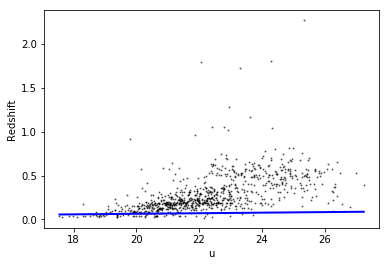

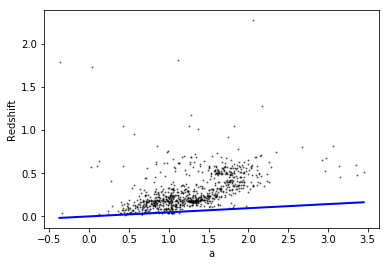

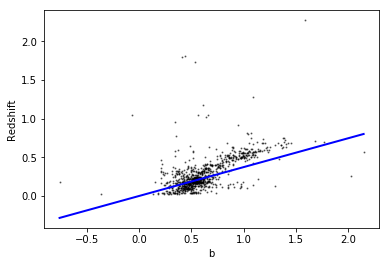

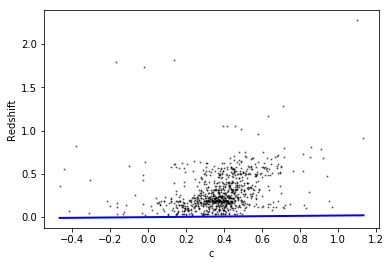

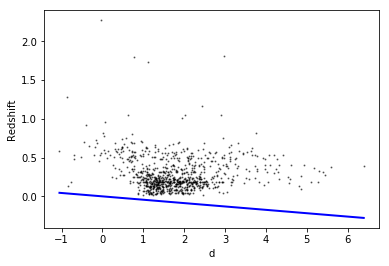

In [42]:
x_names = ['u', 'a', 'b', 'c', 'd']
for i in range(len(x_names)):
    name = x_names[i]
    plt.scatter(x[name], y, color='black',s=1, alpha=0.5)
    x_oops = x_for_plotting_list[x_names.index(name)]
    plt.plot(x_oops, dumb_linreg(x_oops, reg.coef_[i], reg.intercept_), color='blue', linewidth = 2)
    plt.xlabel(name)
    plt.ylabel("Redshift")
    plt.show()

Calculates chi square error for this linear regression. The error is very large!

In [43]:
chi_square_error(y, dumb_linreg(x_oops, reg.coef_[i], reg.intercept_))

107263.56871313594


# Numpy Linear Regression

Creates an array composed of x with a row of 1s at the bottom.
Result is like doing reg.fit on that array and y.

In [275]:
A = np.hstack([x, np.array([np.ones(len(x))]).T]).T
a = A.T
result = np.linalg.lstsq(a, y)
print(result)

(array([ 0.08413178, -0.04490562,  0.17049768,  0.10621348, -0.09540971,
       -1.50258323]), array([19.88937118]), 6, array([661.17377807,  26.30489794,  13.7106843 ,   5.38794759,
         4.201108  ,   1.57798011]))


/Users/marin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


Coefficients is the first element of the result array. It's an array of 5 coefficients, one for each column in x, and one intercept. Intercepts is the first element of the coefficients array, since there is one intercept for all 5 columns.

In [265]:
coefficients = result[0]
print(coefficients)
intercepts = result[0][0]
print(intercepts)
print(np.shape(coefficients), np.shape(x))

[ 0.08413178 -0.04490562  0.17049768  0.10621348 -0.09540971 -1.50258323]
0.08413178130500547
(6,) (865, 5)


np_x_for_plotting_list calls x_for_plotting on each column of a. This creates an array of 50 x values for each of the 5 graphs.
np_x_for_graph adds a row of 1s on the bottom of np_x_for_plotting_list, so that it can pe inputted with coefficients to produce the dot product of y values. (a little confused on this)

In [266]:
a = A
np_x_for_plotting_list = np.array([x_for_plotting(a, 0), x_for_plotting(a, 1), x_for_plotting(a, 2), \
                          x_for_plotting(a, 3), x_for_plotting(a, 4)])

np_x_for_graph = np.hstack([np_x_for_plotting_list.T, np.array([np.ones(len(np_x_for_plotting_list.T))]).T])

In [267]:
print(a)

[[25.92735 19.38905 21.50923 ... 24.27124 23.24958 23.03607]
 [ 1.74958  0.65768  1.21367 ...  1.8799   1.82523  1.99001]
 [ 0.68151  0.37921  0.55975 ...  0.63563  0.97555  1.07223]
 [ 0.13412  0.29902  0.36866 ...  0.42307  0.40981  0.20214]
 [ 4.93165  1.14409  1.81583 ...  2.88699  1.21758  0.3745 ]
 [ 1.       1.       1.      ...  1.       1.       1.     ]]


y_for_graph takes the dot product of coefficients and np_x_for_graph.T, which produces the predicted y value.

In [268]:
y_for_graph = np.dot(coefficients, np_x_for_graph.T) 
print(np.shape(np_x_for_graph.T), np.shape(coefficients))

(6, 50) (6,)


chi_square_error_list is a list of each chi square error of each graph.
plt.scatter plots each column of x and the redshift.
plt.plot plots a line where the x values are an element in np_x_for_graph.T, and the y values are the array y_for_graph.

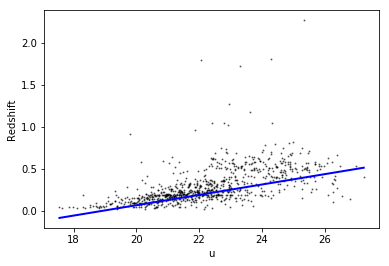

31853.045029213175
None


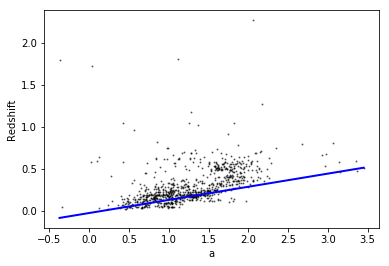

31853.045029213175
None


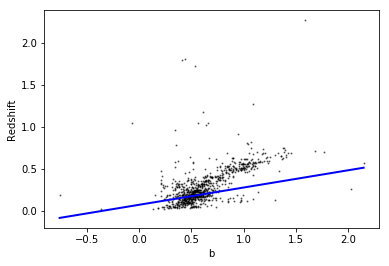

31853.045029213175
None


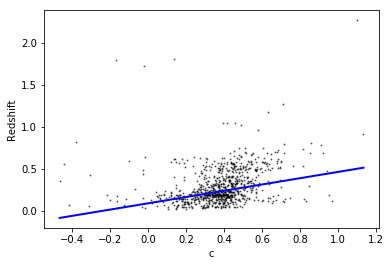

31853.045029213175
None


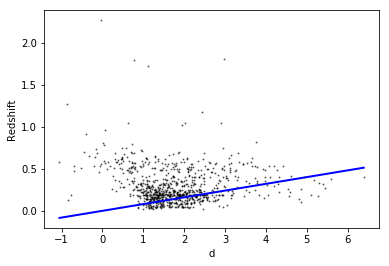

31853.045029213175
None


In [276]:
chi_square_error_list = []
for i in range(len(x_names)):
    name = x_names[i]
    
    #intermediate = np_x_for_graph.T[i] * coefficients[i]# + coefficients[-1]
    
    plt.scatter(x[name], y, color='black',s=1, alpha=0.5)

    plt.plot(np_x_for_graph.T[i], y_for_graph, color='blue', linewidth = 2)
    plt.xlabel(name)
    plt.ylabel("Redshift")
    plt.show()
    
    print(chi_square_error(y, np.dot(coefficients, A)))